<a href="https://colab.research.google.com/github/nguyenvu2709/phantichdulieu/blob/main/Nguyenvu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [17]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0


In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [19]:
class_names = ['Áo thun', 'Quần dài', 'Áo liền quần', 'Đầm', 'Áo khoác',
               'Sandal', 'Áo sơ mi', 'Giày', 'Túi xách', 'Ủng']

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
len(train_labels)

60000

In [22]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
test_images.shape

(10000, 28, 28)

In [24]:
len(test_labels)

10000

In [25]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4940 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3698 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3324 - accuracy: 0.8793
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3095 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2923 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2774 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2672 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2568 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2463 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.238

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

In [30]:
predictions = model.predict(test_images)

In [31]:
predictions[0]

array([5.1840391e-07, 2.5745881e-09, 1.2296942e-09, 3.0364159e-11,
       4.0171834e-08, 2.2889813e-04, 6.0206574e-08, 4.3650296e-02,
       4.1770923e-07, 9.5611972e-01], dtype=float32)

In [32]:
np.argmax(predictions[0])

9

In [33]:
test_labels[0]

9

In [34]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

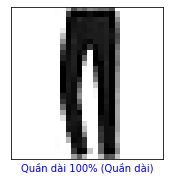

In [54]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.show()